# 문제 1
강의 노트 연습문제 2.7

Write a program which simulates the followings. 
Pick an initial point $ z_{0} = (x_{0}, y_{0})$.  $t$  arbitrarily in the plane. 
For $ k = 0, 1, 2, ..., $
$$ z_{k+1} := \begin{pmatrix} x_{k+1}\\ y_{k+1} \end{pmatrix} = A_{S_{k}}z_{k} + d_{S_{k}}$$
where $S_{k}$ is chosen randomly from the set { $ {1, 2, ..., m}$}, with  probability $p_{i} = Pr(S{k} = i)$, $i = 1, ...,m$ and $ \Sigma P_{i} = 1 $

$A$ is a (2,2)-matrix and $d$ is a 2-D column vector.). 
Plot the sequence. 

## (a) What can you see in the figure generated by your program for the following data set?

In [50]:
import numpy as np
import random
from matplotlib import pyplot as plt


class MatrixCalculation():
    def __init__(self): #pick an initial point z0 arbitrarily 
        self.a = None 
        self.d = None
        self.p = None
        self.plt = []

    def a_d_p(self, a, d, p):
        self.a = a
        self.d = d
        self.p = p

    def random_choice_Sk (self, m):
        ###1. choose S_{k} with probability p
        sk_set = list(range(1, m+1))
        weights_tpl = tuple((self.p[i]) for i in range(1, m+1))
        sk = random.choices(sk_set, weights= weights_tpl, k=1)[0]
        return sk

    def calculation (self, z_cur, iteration_no, m): #input z_0 as z_cur; and number of iteration needed 
        self.plt.append(z_cur)
        while iteration_no > 0:
            random_sk = self.random_choice_Sk(m)
            z_next = self.a[random_sk] @ z_cur + self.d[random_sk]
            return self.calculation(z_next,iteration_no-1, m)

    def plot (self):
        plt_array = np.array(self.plt)
        return plt_array 

    def plot_show(slef, data):
        data_list = []
        for i in range(len(data)):
            x, y = data[i]
            data_list.append([x[0], y[0]])
        
        data_list = np.array(data_list)
        x, y = data_list.T
        plt.scatter(x, y)
        plt.show()
        #ax = plt.axes(projection='3d')
        #ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);


In [51]:
##data set:###
A = {
    1: np.matrix('0 0; 0 .27'),
    2: np.matrix('-.139 .263; .246 .224'),
    3: np.matrix('.17 -.215; .222 .176'),
    4: np.matrix('.781 .034; -.032 .739')
     }
d = {
    1: np.matrix('.5; 0'),
    2: np.matrix('.57; -.036'),
    3: np.matrix('.408; .0893'),
    4: np.matrix('.1075; .27')
}
p = {
    1: .02,
    2: .15,
    3: .13,
    4: .70
}

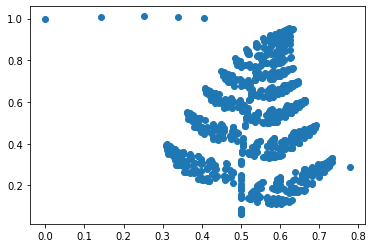

In [66]:
matcalc = MatrixCalculation()
matcalc.a_d_p(A, d, p)
matcalc.calculation(np.matrix('0; 1'), 1070, 4) #initialize z0 = (0,0), iterate ### times with m = 4
matcalc.plot_show(matcalc.plot())

## (b) Try another test data set of random events (try one of m = 3, 4, 5) should be different from the picture in (a) and turn it in.). Your picture obtained

In [15]:
## different p ##
p_2 = {
    1: .02,
    2: .15,
    3: .83,
}

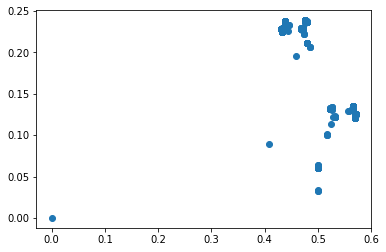

In [16]:
matcalc_1 = MatrixCalculation()
matcalc_1.a_d_p(A, d, p_2)
matcalc_1.calculation(np.matrix('0; 0'), 1000, 3) #initialize z0 = (0,0), iterate 20 times with m = 4
matcalc_1.plot_show(matcalc_1.plot())

# 문제 2
강의노트 연습문제 3.3

First implement the `MATLAB` programs ````clgs, mgs, qrhouse````, and ````formQ```` in python.

(a) implement the following `MATLAB` code in `Python` and test it
````
[U,X]=qr(randn(80));
[V,X]=qr(randn(80));
J=1:80; S=diag(2.^(-J)); 
A=U*S*V;
[Qc,Rc]=clgs(A); 
[Qm,Rm]=mgs(A);
````

Implementing the MATLAB program semilogy in Python,
plot the diagonal elements $r_{jj}$ produced by both computations with $s_{jj}$ in one figure. Which is more numerically stable, classical or modified?

In [46]:
import numpy as np
import random
from matplotlib import pyplot as plt

#### Decomposition
class Decomposition():
    def __init__(self) -> None:
        self.A = None

    def random_nn(self, n) -> None: #return n*n random matrix
        self.A = np.random.random((n,n)) 

    def qr(self) -> None:
        pass

    def clgs(self) -> None:
        m,  n = len(self.A), len((self.A.T))
        V  = self.A
        Q  = np.eye(m, n)
        R  = np.zeros((n, n))

        i = j = 0
        for j in range (0, n):
            for i in range (0, j-1):
                R[i, j] = Q[:, i].T @ self.A[:, j]
                V[:, j] = V[:, j] - R[i][j] @ Q[:, i]
            R[j, j] = np.linalg.norm(V[:, j])
            Q[:, j] = V[:, j]/R[j, j]
        return R, Q


    def mgs(self) -> None:
        pass

    def qrhouse(self) -> None:
        pass

    def fomrQ(self)-> None:
        pass


In [47]:
d = Decomposition()
d.random_nn(80)
d.clgs()

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

(b) Implement the following MATLAB code in Python
````
A=[.70000 .70711; .70001 .70711]; 
[Qm,Rm]=mgs(A);
[V,R] = qrhouse(A); 
Q=formQ(V); 
norm(Q'*Q-eye(2))
norm(Qm'*Qm-eye(2))
````

Which is more numerically stable, householder or modified??
Which is more numerically stable, householder or modified??

# 문제 3
강의노트 연습문제 3.4

Write a python function that computes a reduced QR decomposition $A = QR$ of an $m*n$ matrix with $ m \geq n$   using Givens rotation.
Turn in your codes and the results when it is applied to a matrix A you chosen arbitrarily. 
Your results should the same as that of the MATLAB program ````[Q, R] = qr(A) ````to verify your code.

In [ ]:
### code here

# 문제 4
각자 선택한 신호와 zero-mean random noise를 이용하여 강의노트 그림 4.2와 같이 Python으로 구현하여 풀어라